
# Harry Potter and the Graph of Centrality

Web Analytics

June 23 2018

#### Group 3 Members:

* Rafal Decowski 

* Tze Fung Lung  

* Yun Mai

* Ahsanul Choudhury


** Project Objectives **

1.	Identify and load a network dataset that has some categorical information available for each node.

2.	For each of the nodes in the dataset, calculate degree centrality and eigenvector centrality.

3.	Compare your centrality measures across your categorical groups.


### Data 

There are two datasets used in this project - Relationships & Affiliations. Both were collected by scrapping Harry Potter [Wikipedia Pages](https://en.wikipedia.org/wiki/List_of_Harry_Potter_characters). The relationships between characters were extracted using the NLTK Python package. The affiliation dataset was obtained by scrapping additional Wikipedia pages and Harry Potter fan site: 
- [Death Eater](https://en.wikipedia.org/wiki/Death_Eater)
- [Order of the Phoenix](https://en.wikipedia.org/wiki/Order_of_the_Phoenix_(fictional_organisation)
- [Harry Porter](http://harrypotter.wikia.com/wiki/Lee_Jordan)


The characters were assigned a _side_, _good_ or _evil_, based on the character's affiliation. Members of Dumbledore’s Army or acting as Dumbledore’s Army allies, were assigned to the good side. Similarly, members of the Order of Phoenix are considered as _good_ even though there were several previous members who were disloyal. The Death Eaters are the bad guys in the fantasy novels and they were marked as evil. There are some characters like Muggles, goblins, governors, animals who are without an identified affiliation and remain neutral in the main conflict.


### Objective 

By measuring eigenvector centrality and degree centrality, we will determine the most influential characters in the story. By visualizing the relationship network graph, we will be able to see categorical communities - by affiliation as well by side. 
Finally, we will investigate the role and influence of Dumbledore's spy - Severus Snape.

### Approach

The relationship dataset will create a network of nodes and edges and the affiliation dataset will serve as the visual clue as well as the categorical pivot for the centrality measurements. For each of the nodes in the dataset, degree centrality and eigenvector centrality will be calculated.

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data

In [2]:
# Load Data into Pandas dataframes
relationships_df = pd.read_csv('D:\\Rafal\\CUNY\\620\\hw\\hw3\\data\\relationships.csv')
affiliation_df = pd.read_csv('D:\\Rafal\\CUNY\\620\\hw\\hw3\\data\\affiliation.csv')

### Create a dataframe with all unique characters

In [3]:
# Create a set of unique characters
unique_characters = set(relationships_df.source.tolist()+
                        relationships_df.target.tolist()+
                        affiliation_df.character.tolist())

print("There are", len(unique_characters), "unique characters.")

# Create an affiliation dataframe with all names
full_affiliation_df = pd.DataFrame(list(unique_characters), columns=['character'])
full_affiliation_df = pd.merge(full_affiliation_df, affiliation_df, how='outer') 

There are 187 unique characters.


### Assign Character sides - Good, Evil and Neutral

In [4]:
# Sides dictionary for each of the affiliations
sides = {'Death Eater': 'evil',
         "Dumbledore's Army": 'good',
         "Dumbledore's Army allies": 'good',
         "Order of the Phoenix": 'good',
         "Order of the Phoenix allies": 'good',
         "Other": 'neutral'}

# Populate dataframe with sides based on the above dictionary
full_affiliation_df['side'] = full_affiliation_df['affiliation'].map(sides)

# Populate missing values with Other as affiliation and neutral as side
full_affiliation_df['affiliation'] = full_affiliation_df['affiliation'].fillna("Other")
full_affiliation_df['side'] = full_affiliation_df['side'].fillna("neutral")

# Manual character side adjustments based the knowledge of the book
full_affiliation_df.loc[full_affiliation_df.character == "Nagini", 'side'] = "evil"
full_affiliation_df.loc[full_affiliation_df.character == "Severus Snape", 'side'] = "good"

In [5]:
full_affiliation_df.head()

,character,affiliation,side
0,Narcissa Malfoy,Other,neutral
1,Merope,Other,neutral
2,Vincent Crabbe Sr.,Other,neutral
3,Fawkes,Other,neutral
4,Helena Ravenclaw,Order of the Phoenix allies,good


# Initialize a graph object

In [6]:
# Create graph and edges from the relationship dataframe
g = nx.from_pandas_edgelist(relationships_df, source='source', target='target')

# Add a graph name
g.graph['name'] = 'HP Characters'

### View the infomation of the graph 

In [7]:
print(nx.info(g))

Name: HP Characters
Type: Graph
Number of nodes: 119
Number of edges: 389
Average degree:   6.5378


## Assign affiliation and side to each node (character)

In [8]:
# Create dictionaries with affiliation and side for easy mapping with the nodes
aff_dict = dict(zip(full_affiliation_df.character, full_affiliation_df.affiliation))
side_dict = dict(zip(full_affiliation_df.character, full_affiliation_df.side))

# Add attributes
nx.set_node_attributes(g, aff_dict, 'affiliation')
nx.set_node_attributes(g, side_dict, 'side')

# Centrality Measuremens

- **Degree Centrality** - The degree centrality for a node is the fraction of nodes it is connected to.
- **Eigenvector Centrality** - Eigenvector centrality iteratively computes the weighted and directed centrality of a node based on the centrality scores of its connections.

In [9]:
# Compute degree centrality for nodes.
degree_centrality = nx.degree_centrality(g)

# Compute the eigenvector centrality for the graph g. 
eigenvector_centrality = nx.eigenvector_centrality(g)

# Set the  centralities as the node attributes for each node
nx.set_node_attributes(g, degree_centrality, 'degree_centrality')
nx.set_node_attributes(g, eigenvector_centrality, 'eigenvector_centrality')

# Create a df with the measurements
metrics = pd.DataFrame({'eigenvector_centrality': eigenvector_centrality,
                        'degree_centrality': degree_centrality,
                        'affiliation': dict(full_affiliation_df[['character', 'affiliation']].values),
                        'side': dict(full_affiliation_df[['character', 'side']].values)})

round(metrics.head(),2)

,affiliation,degree_centrality,eigenvector_centrality,side
Abbott,Other,0.01,0.02,neutral
Aberforth Dumbledore,Order of the Phoenix,0.01,0.01,good
"Alastor ""Mad-Eye"" Moody",Order of the Phoenix,0.08,0.12,good
Alberforth Dumbledore,Other,0.04,0.07,neutral
Albus Dumbledore,Order of the Phoenix,0.30,0.25,good


In [10]:
full_affiliation_df.affiliation.unique()

array(['Other', 'Order of the Phoenix allies', "Dumbledore's Army",
       'Order of the Phoenix', 'Death Eater', "Dumbledore's Army allies"], dtype=object)

# Centrality Measures by Categorical Features 

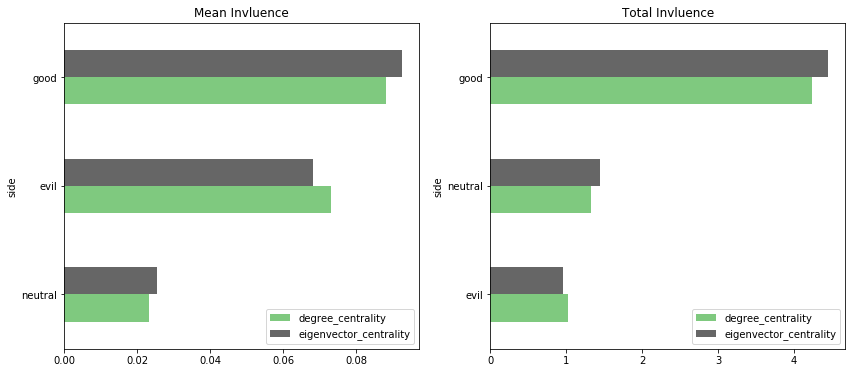

In [11]:
plt.rcParams['figure.figsize'] = [14, 6]

fig, axs = plt.subplots(ncols=2)

metrics.groupby('side').mean().sort_values('degree_centrality').\
    plot(kind='barh', colormap='Accent', ax=axs[0], title='Mean Invluence')

metrics.groupby('side').sum().sort_values('degree_centrality').\
    plot(kind='barh', colormap='Accent', ax=axs[1], title='Total Invluence')


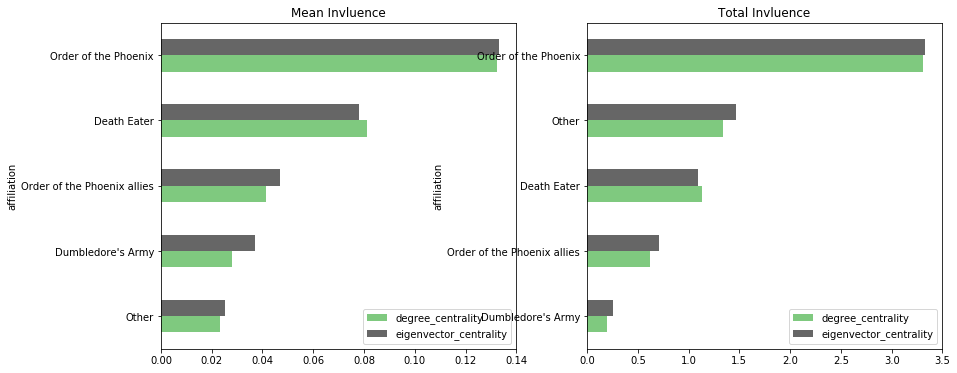

In [12]:
plt.rcParams['figure.figsize'] = [14, 6]

fig, axs = plt.subplots(ncols=2)

metrics.groupby('affiliation').mean().sort_values('degree_centrality').\
    plot(kind='barh', colormap='Accent', ax=axs[0], title='Mean Invluence')

metrics.groupby('affiliation').sum().sort_values('degree_centrality').\
    plot(kind='barh', colormap='Accent', ax=axs[1], title='Total Invluence')

# Graph Visualization

### Color Pallete

In [13]:
# Define color palletes
aff_color_dict = {"Dumbledore's Army": "#3366ff",
                  "Dumbledore's Army allies": "#99b3ff",
                  "Order of the Phoenix": "#40bf80",
                  "Order of the Phoenix allies": "#b3e6cc",
                  "Other": "#b3b3b3",
                  "Death Eater": "#ff4d4d"}

side_color_dict = {'good': '#40bf80',
                   'evil': '#ff4d4d',
                   'neutral': '#b3b3b3'}

# Add coloring to the dataframe 
full_affiliation_df['aff_color'] = full_affiliation_df['affiliation'].map(aff_color_dict)
full_affiliation_df['side_color'] = full_affiliation_df['side'].map(side_color_dict)

full_affiliation_df.head()

,character,affiliation,side,aff_color,side_color
0,Narcissa Malfoy,Other,neutral,#b3b3b3,#b3b3b3
1,Merope,Other,neutral,#b3b3b3,#b3b3b3
2,Vincent Crabbe Sr.,Other,neutral,#b3b3b3,#b3b3b3
3,Fawkes,Other,neutral,#b3b3b3,#b3b3b3
4,Helena Ravenclaw,Order of the Phoenix allies,good,#b3e6cc,#40bf80


In [14]:
aff_colors = dict(zip(full_affiliation_df.character, full_affiliation_df.aff_color))
side_colors = dict(zip(full_affiliation_df.character, full_affiliation_df.side_color))

# Set the coloring palletes to nodes
nx.set_node_attributes(g, aff_colors, 'aff_colors')
nx.set_node_attributes(g, side_colors, 'side_colors')

### Drawing Node Parameters

In [15]:
# Parameters
node_size_degree = [float(g.node[character]['degree_centrality']) * 6000 for character in g]
node_size_eigen = [float(g.node[character]['eigenvector_centrality']) * 6000 for character in g]
node_color_side = [g.node[character]['side_colors'] for character in g]
node_color_aff = [g.node[character]['aff_colors'] for character in g]

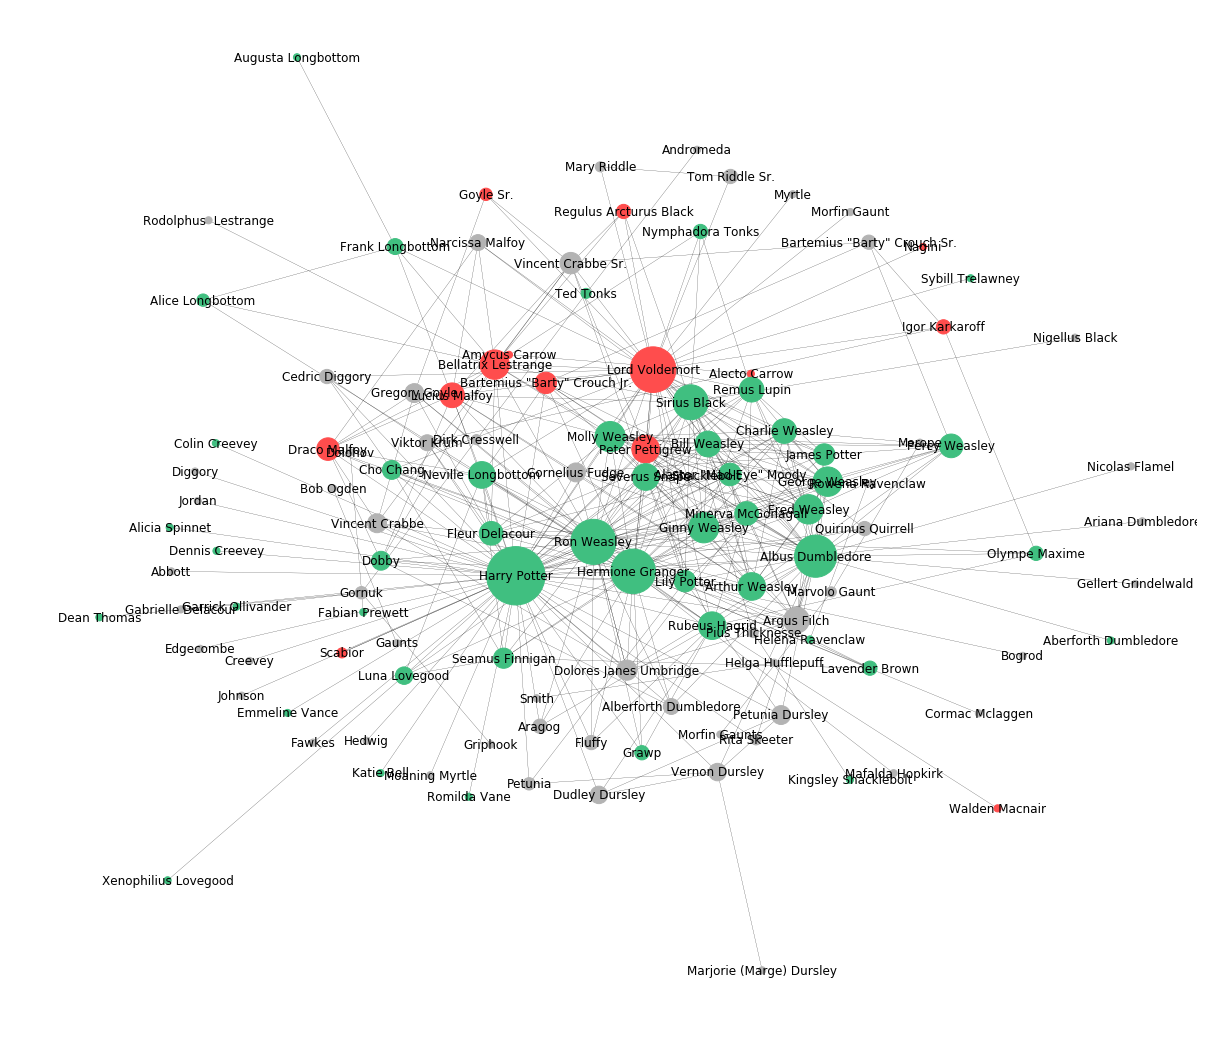

In [16]:
plt.rcParams['figure.figsize'] = [16, 14]
degree_graph = nx.draw_kamada_kawai(g, 
                                    with_labels=True, 
                                    node_color=node_color_side, 
                                    node_size=node_size_degree, 
                                    width=0.2)

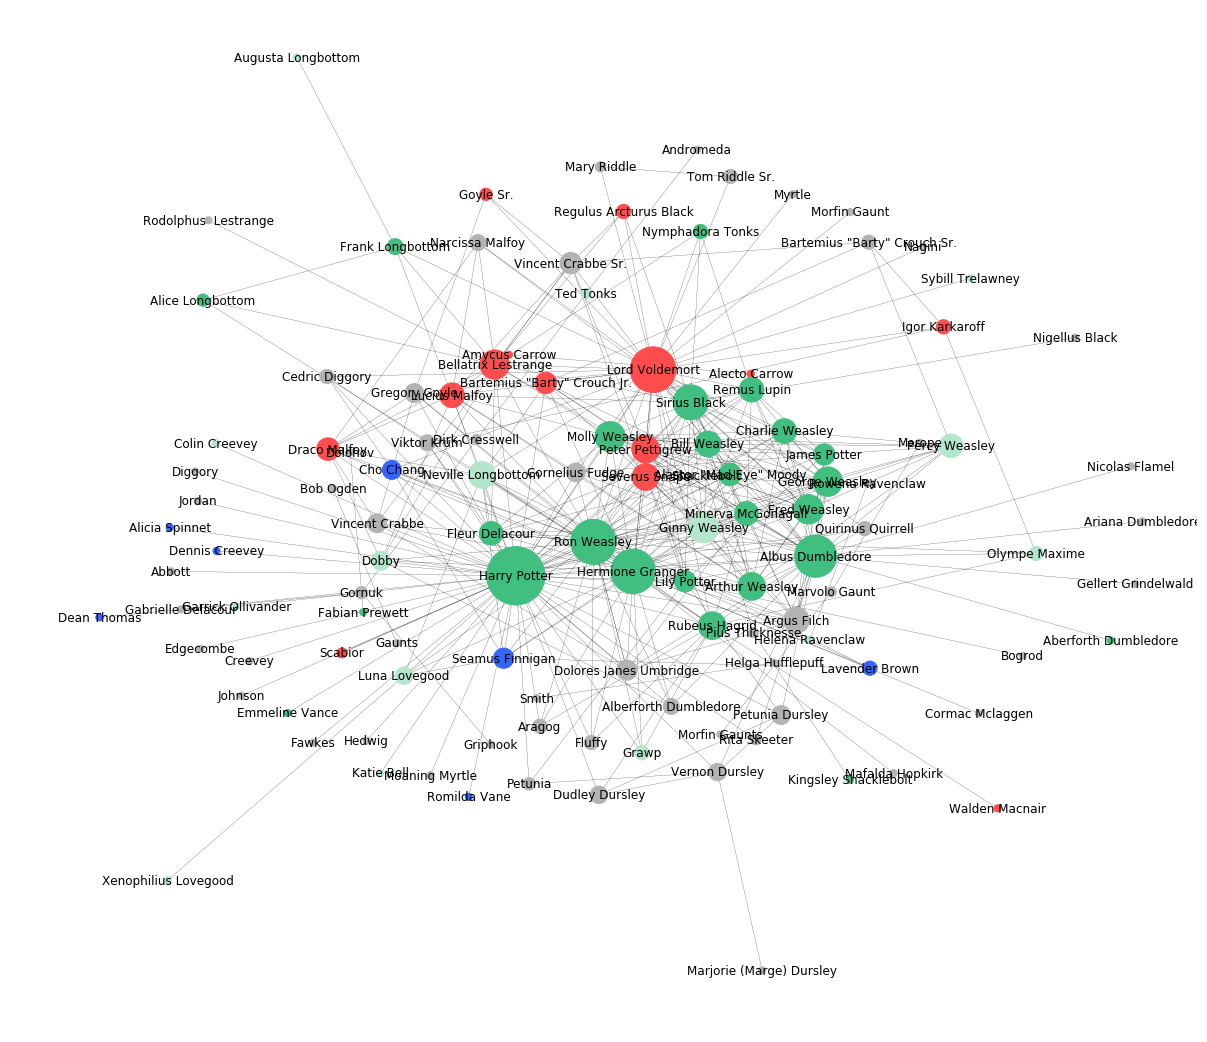

In [17]:
plt.rcParams['figure.figsize'] = [16, 14]
degree_graph = nx.draw_kamada_kawai(g, 
                                    with_labels=True, 
                                    node_color=node_color_aff, 
                                    node_size=node_size_degree, 
                                    width=0.2)

### Reference
http://historicaldataninjas.com/community-detection/